<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-teammexcol/blob/main/Proyecto_Avances/Semana4_Actividad1_ipynbipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Ciencia y Analítica de Datos

**Equipo 40**

Por:

* Víctor Alejandro Regueira Romero - A01794404
* Carlos Julio León Caicedo - A01793947

Profesor asignado:

* Roberto Antonio Guevara González

A 11 de octubre de 2022
---

# Parte 1: Ejercicio guiado 

Asignamos a la variable input la liga con nuestro dataset que ya ha pasado por limpieza y filtrado.

In [1]:
input = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-teammexcol/main/Proyecto_Avances/Dataset_Cleaned.csv"

Librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos el dataset dentro de la variable df y asignamos la columna ID como index

In [3]:
df = pd.read_csv(input, index_col = 'ID')

In [4]:
lista_amt= list(df.iloc[:,11:17])
lista_amt

['amt_sep', 'amt_aug', 'amt_jul', 'amt_jun', 'amt_may', 'amt_apl']

In [5]:
lista_paid = list(df.iloc[:,17:23])
lista_paid

['paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apl']

In [6]:
lista_hry = list(df.iloc[:,5:11])
lista_hry

['hry_sep', 'hry_aug', 'hry_jul', 'hry_jun', 'hry_may', 'hry_apl']

In [7]:
df = df.drop(columns = lista_hry)

In [8]:
df = df.drop(columns = lista_paid)

In [9]:
#df = df.drop(columns = lista_amt) # No eliminamos los valores de amt

In [10]:
df = df.drop(columns = ['marital_status', 'education','gender'])

In [11]:
df.head()

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,Y,total_amt,total_paid
ID,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,1.0,7704.0,689.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1.0,17077.0,5000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0.0,101653.0,11018.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0.0,231334.0,8388.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0.0,109339.0,59049.0


## Normalización

Para este caso debido a que la variable de salida Y se encuentra en el rango con valores de [0,1], hemos dicidido normalizar nuestro dataframe completo antes de realizar el análisis de componentes principales.

Por lo tanto, utilizaremos Normalización mín.-máx. ajustando los valores de registros para mantener un rango objetivo de [0, 1].

Para eso haremos la escalación usando la librería sklearn.preprocessing, e importaremos el método **MinMaxScaler**

In [12]:
from sklearn.preprocessing import MinMaxScaler

Definimos una variable para almacenar todos los nombres de nuestras columnas (atributos)

In [13]:
cols = df.columns

Corremos el método **MinMaxScaler()** y a este resultado le aplicamos el método fit_transform() para escalar nuestro DataFrame a valores entre [0,1].

In [14]:
df[cols] = MinMaxScaler().fit_transform(df[cols])
df.head(5)

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,Y,total_amt,total_paid
ID,,,,,,,,,,,
1,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,1.0,0.061420,0.000183
2,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,1.0,0.063094,0.001328
3,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.0,0.078197,0.002927
4,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.0,0.101353,0.002228
5,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.0,0.079569,0.015688


## Determinación de Componentes Principales (PC)
Es en el siguiente flujo en donde determinaremos cuál es el número de componentes que tienen la mayor concentración de proporción acumulada de la varianza.

Comenzamos importando la función PCA de la librería sklearn módulo decomposition

In [15]:
import numpy as np
from sklearn.decomposition import PCA

In [16]:
from sklearn import preprocessing

In [17]:
pcs = PCA()
pcs.fit(preprocessing.scale(df))

PCA()

In [18]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,2.5872,1.1196,1.0080,0.9249,0.7959,0.5399,0.3297,0.2572,0.2038,0.2008,0.0
Proportion of variance,0.6085,0.1140,0.0924,0.0778,0.0576,0.0265,0.0099,0.0060,0.0038,0.0037,0.0
Cumulative proportion,0.6085,0.7224,0.8148,0.8926,0.9502,0.9767,0.9865,0.9926,0.9963,1.0000,1.0


In [19]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df.columns
                                )
pcsComponents_df.iloc[:,:]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
amount_credit,0.142528,0.606901,-0.088020,0.243609,-0.736070,-0.035845,0.028925,0.016932,-0.007065,-0.002852,-1.566918e-17
age,0.028634,0.293359,-0.855341,-0.357356,0.231788,-0.008874,-0.001500,-0.001092,-0.000352,-0.000343,-7.710712e-17
amt_sep,0.358452,-0.094258,-0.002206,-0.119104,-0.100884,0.494457,-0.459540,-0.250058,0.475415,0.249576,1.782066e-01
amt_aug,0.367274,-0.095684,0.001541,-0.096949,-0.054615,0.404285,-0.126130,0.084574,-0.690656,-0.387800,1.722473e-01
amt_jul,0.370276,-0.062249,0.009484,-0.032442,0.032771,0.196571,0.593694,0.574664,0.168754,0.280727,1.678305e-01
amt_jun,0.372522,-0.060192,0.009209,-0.018056,0.029316,-0.184173,0.471246,-0.569331,0.231888,-0.445190,1.556867e-01
amt_may,0.368685,-0.053112,0.009624,0.001746,0.041603,-0.443240,-0.054626,-0.272337,-0.402361,0.634247,1.471278e-01
amt_apl,0.360383,-0.046043,0.010398,0.015364,0.054237,-0.541280,-0.436153,0.447182,0.229653,-0.328667,1.441204e-01
Y,-0.012057,-0.523472,-0.501958,0.670237,-0.153808,0.031269,-0.003001,-0.002284,0.001357,0.000508,-3.961722e-17
total_amt,0.384802,-0.073536,0.006328,-0.047584,-0.003684,0.020518,-0.001641,0.002389,0.004443,0.001558,-9.185590e-01


In [20]:
pcsComponents_df.PC1.idxmax()

'total_amt'

In [25]:
pcsComponents_df.PC1.idxmin()

'Y'

In [21]:
pcsComponents_df.PC1.nlargest(7)

total_amt    0.384802
amt_jun      0.372522
amt_jul      0.370276
amt_may      0.368685
amt_aug      0.367274
amt_apl      0.360383
amt_sep      0.358452
Name: PC1, dtype: float64

In [22]:
pcsComponents_df.PC1.nsmallest(7)

Y               -0.012057
age              0.028634
amount_credit    0.142528
total_paid       0.159965
amt_sep          0.358452
amt_apl          0.360383
amt_aug          0.367274
Name: PC1, dtype: float64

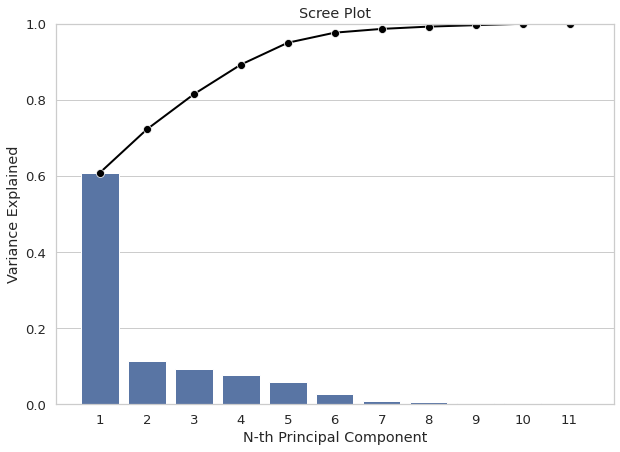

In [23]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [40]:
pcs.explained_variance_ratio_[0:4].sum()

0.8925773818701307

In [29]:
corrmatt = df.corr()
corrmatt

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,Y,total_amt,total_paid
amount_credit,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,-0.153781,0.302176,0.352499
age,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.013881,0.055163,0.040752
amt_sep,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,-0.019686,0.940106,0.256352
amt_aug,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,-0.014240,0.961170,0.286628
amt_jul,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,-0.014141,0.961950,0.359513
amt_jun,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,-0.010216,0.964495,0.354552
amt_may,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,-0.006856,0.951671,0.359727
amt_apl,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,-0.005505,0.928710,0.362983
Y,-0.153781,0.013881,-0.019686,-0.014240,-0.014141,-0.010216,-0.006856,-0.005505,1.000000,-0.012767,-0.102355
total_amt,0.302176,0.055163,0.940106,0.961170,0.961950,0.964495,0.951671,0.928710,-0.012767,1.000000,0.343832


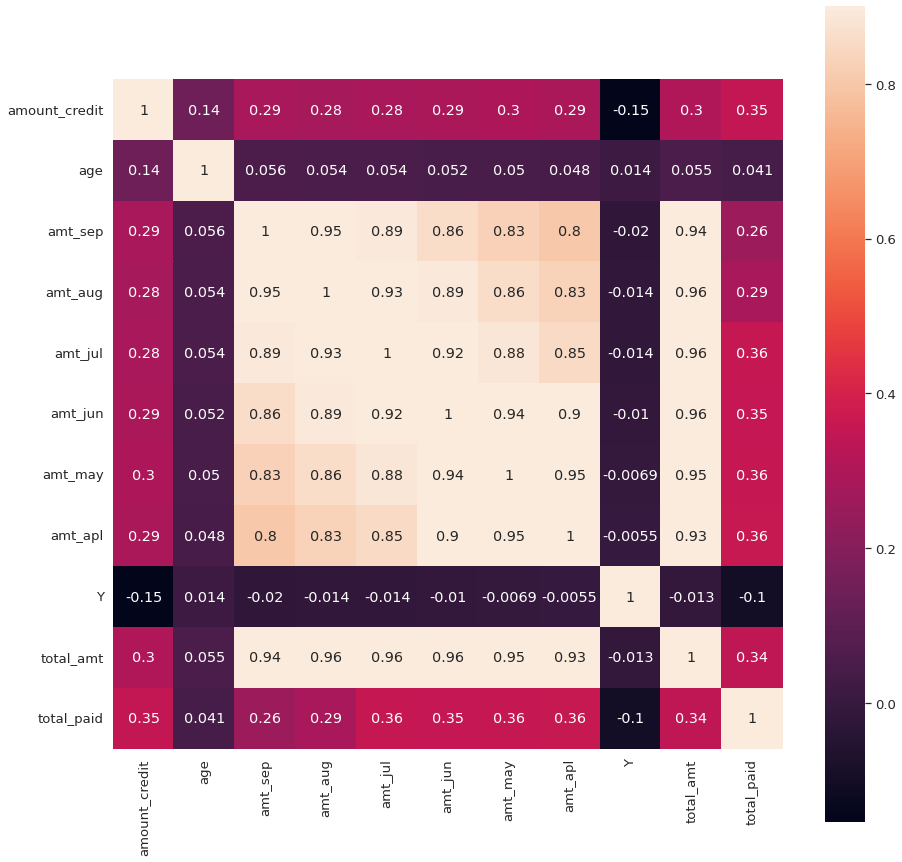

In [38]:
f, ax = plt.subplots(figsize = (15,15)) #Definir el área de trabajo.
sns.heatmap(corrmatt, vmax = .9, square = True, annot = True)